### 修改:

#### 把filter改成5的N次方倍數

#### poolsize改成3乘3的矩陣

#### 最後一層神經元用33個，activation改用softplus

#### Learnig Rate用0.69較大的數字。

#### batchsize用50、epochs用6

#### 最後發現準確率不太夠又加了2次所以epochs是8

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

### 讀取資料

In [2]:
from tensorflow.keras.datasets import fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train=x_train.reshape(60000,28,28,1)/255
x_test=x_test.reshape(10000,28,28,1)/255

In [6]:
x_train[1].shape

(28, 28, 1)

In [7]:
y_train[1]

0

In [8]:
# 要變成one hot encoding
from tensorflow.keras.utils import to_categorical 

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 建置CNN

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(5,(2,2),padding='same',
                input_shape=(28,28,1),
               activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(3,3)))

In [13]:
model.add(Conv2D(25,(2,2),padding='same',
                activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(3,3)))

In [15]:
model.add(Conv2D(125,(2,2),padding='same',
                activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(3,3)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(33, activation='softplus'))

In [19]:
model.add(Dense(10, activation='softmax'))

### 查看

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 5)         25        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 5)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 25)          525       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 25)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 125)         12625     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 125)         0         
_________________________________________________________________
flatten (Flatten)            (None, 125)               0

In [21]:
model.compile(loss='mse', optimizer=SGD(lr=0.69),
             metrics=['accuracy'])

### Fit

In [22]:
model.fit(x_train, y_train, batch_size=50, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 40s 659us/sample - loss: 0.0701 - accuracy: 0.4190
Epoch 2/6
60000/60000 [==============================] - 42s 705us/sample - loss: 0.0450 - accuracy: 0.6597
Epoch 3/6
60000/60000 [==============================] - 45s 743us/sample - loss: 0.0395 - accuracy: 0.7049
Epoch 4/6
60000/60000 [==============================] - 44s 741us/sample - loss: 0.0292 - accuracy: 0.7911
Epoch 5/6
60000/60000 [==============================] - 45s 750us/sample - loss: 0.0266 - accuracy: 0.8119
Epoch 6/6
60000/60000 [==============================] - 45s 752us/sample - loss: 0.0249 - accuracy: 0.8241


### 0.82有點太低再訓練兩次

In [23]:
model.fit(x_train, y_train, batch_size=50, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 45s 744us/sample - loss: 0.0235 - accuracy: 0.8347
Epoch 2/2
60000/60000 [==============================] - 46s 767us/sample - loss: 0.0225 - accuracy: 0.8411


### Predict

In [26]:
result = model.predict_classes(x_test)

In [27]:
def prediction(n):
    print("預測",class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap="Greys")

預測 Sneaker


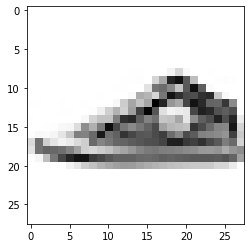

In [28]:
prediction(3812)

In [29]:
from ipywidgets import interact_manual

In [30]:
interact_manual(prediction, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.prediction(n)>

### 驗證準確度

In [31]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 346us/sample - loss: 0.0222 - accuracy: 0.8447


In [32]:
loss, acc = score

In [33]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8447


### 把model存起來

In [34]:
model.save('myCNNmodel.h5')